# Microestructura y Sistemas de Trading
## 001 Microstructure

Presenta :

- José Armando Melchor Soto


---

### Librerías 

In [46]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize

---

### Funciones 

#### Función Earlang 

In [47]:
def earlang(S, k, lam):

    return (lam**k * S**(k-1) * np.exp(-lam*S)) / math.factorial(k-1)

#### Función PLB

In [48]:
def p_lb(spreads):

    return np.maximum(0.5 - 0.08 * spreads, 0)

#### Función PLS

In [49]:
def p_ls(spreads):
    
    return np.maximum(0.5 - 0.08 * spreads, 0)

#### Función Objetivo

In [50]:
def objective(x, p_i, S0, k, lam):

     Ka, Kb = x
     
     p1 = (1 - p_i) * (p_lb(Ka - S0) * (Ka - S0) + (p_lb(S0 - Kb) * (S0 - Kb)))
     
     p2 = quad(lambda S: (S - Ka) * earlang(S, k, lam), Ka, np.inf)[0]

     p3 = quad(lambda S: (Kb - S) * earlang(S, k, lam), 0, Kb)[0]
     
     return -(p1 - p_i * (p2 + p3))

#### Función Optimal Bid-Ask

In [51]:
def optimize_bid_ask(S0, p_i, k, lam):

    x0 = [S0+1, S0-1]

    bounds = [(10, 33), (10, 33)]
    
    constraint = {'type': 'ineq', 'fun': lambda x: x[0] - x[1]}  

    result = minimize(objective, x0, method="SLSQP", args=(p_i, S0, k, lam), bounds=bounds, constraints=constraint)

    ask, bid = result.x

    return ask, bid

#### Función Gráfica Price Distribution

In [52]:
def price_distribution(x, y):

    plt.figure(figsize=(8,5))
    
    plt.plot(x, y, label="Price Distribution", color="black")
    
    plt.title("Price Distribution")
    
    plt.xlabel("S")
    
    plt.ylabel("Probability Density")
    
    plt.legend()
    
    plt.grid(True, linestyle="--", alpha=0.6)
    
    plt.show()

#### Función Gráfica Expected Revenue 

In [53]:
def expected_revenue(spread, fun):

    plt.figure(figsize=(8,5))

    plt.plot(spread, fun, label="O", color="black")

    plt.plot(spread, (1 - p_i) * spread, label="R", color="red")
    
    plt.plot(spread, spread, label="Q", color="blue")

    plt.title("Expected Revenue")
    plt.xlabel("Spread")
    plt.ylabel("Payoff")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

#### Función Gráfica Bid-Ask

In [54]:
def Bid_Ask(S, S0, ask, bid, ear):
    
    plt.figure(figsize=(8,5))

    plt.plot(S, ear, label="Price Distribution", color="black")

    plt.axvline(x=S0, color="black", linestyle="--", linewidth=2, label=f"S0 = {S0:.2f}")

    plt.axvline(x=ask, color="red", linestyle="--", linewidth=2, label=f"Ask = {ask:.2f}")
    
    plt.axvline(x=bid, color="blue", linestyle="--", linewidth=2, label=f"Bid = {bid:.2f}")

    plt.title("Optimal Bid-Ask")
    plt.xlabel("S")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


---

### Parámetros

In [55]:
k= 60
lam= 3
S0 = 19.90
p_i = 0.4
S = np.linspace(10, 33, 100)
bounds = [(10, 33), (10, 33)]

### Price Distribution

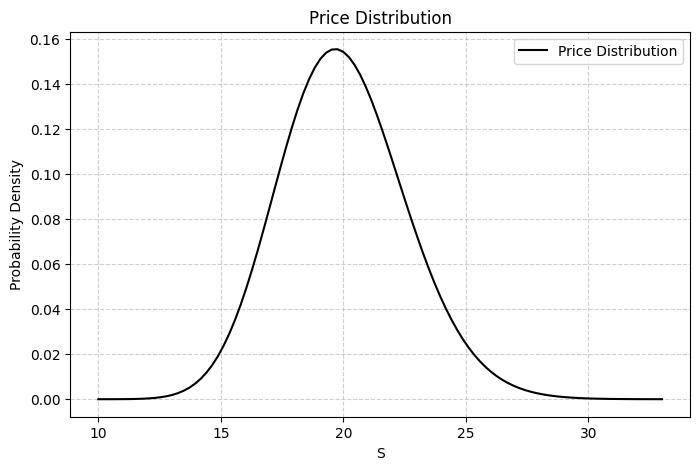

In [56]:
ear = earlang(S, k, lam)

price_distribution(S, ear)

### Expected Revenue

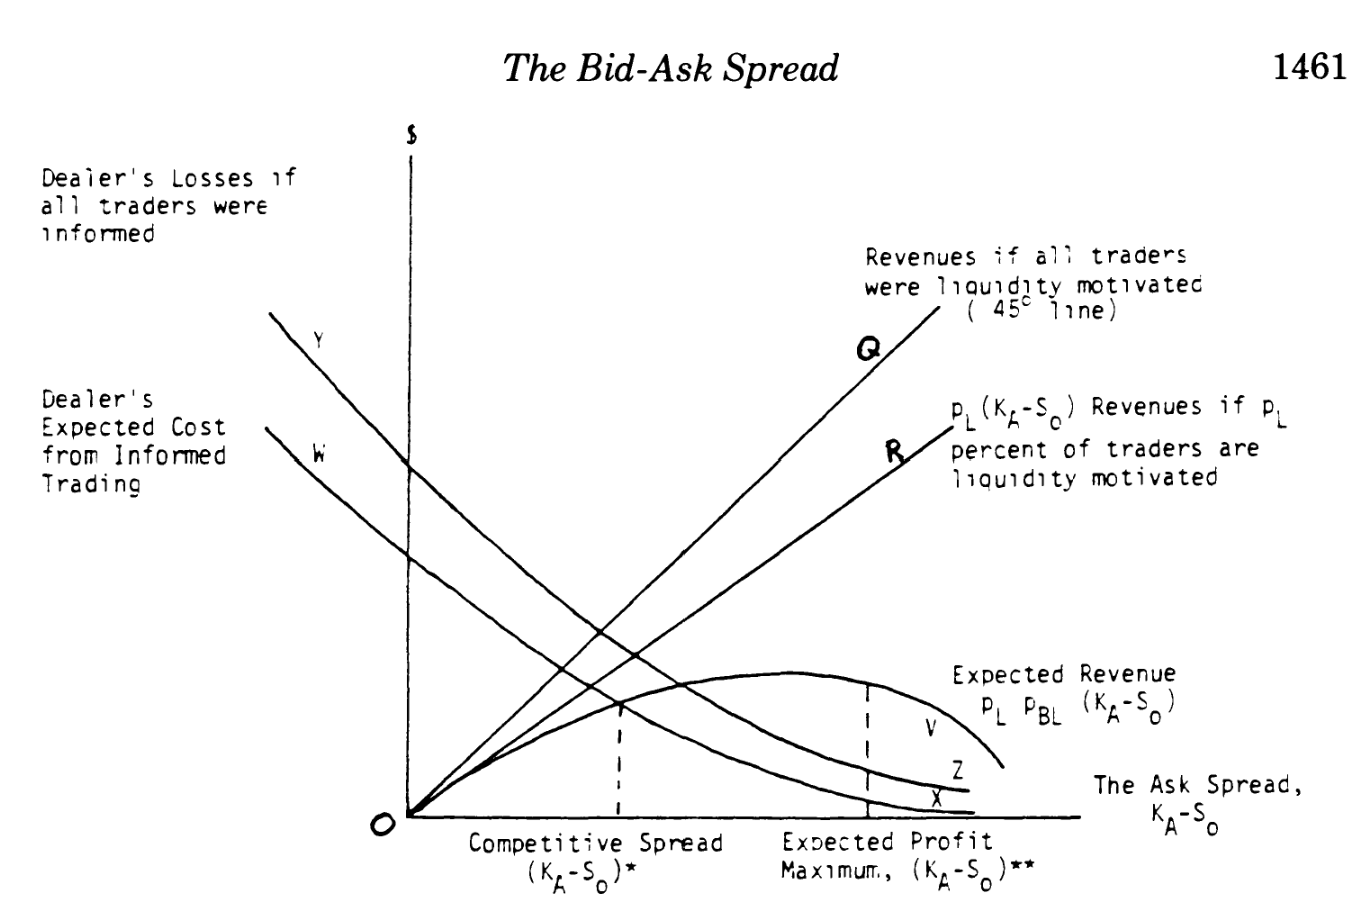

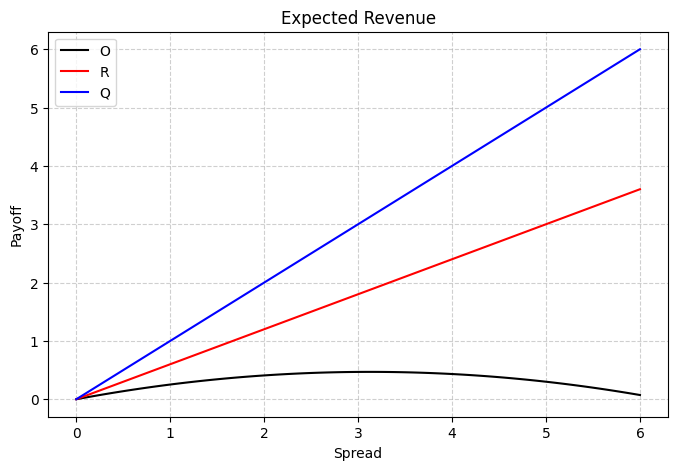

In [57]:
spread = np.linspace(0, 6, 100)

fun = (1 - p_i) * p_lb(spread) * spread

expected_revenue(spread, fun)

#### Optimal Bid-Ask

In [58]:
ask,bid = optimize_bid_ask(S0, p_i, k, lam)

print(f"Ask opt: {ask:.2f}")

print(f"Bid opt: {bid:.2f}")

Ask opt: 23.43
Bid opt: 16.45


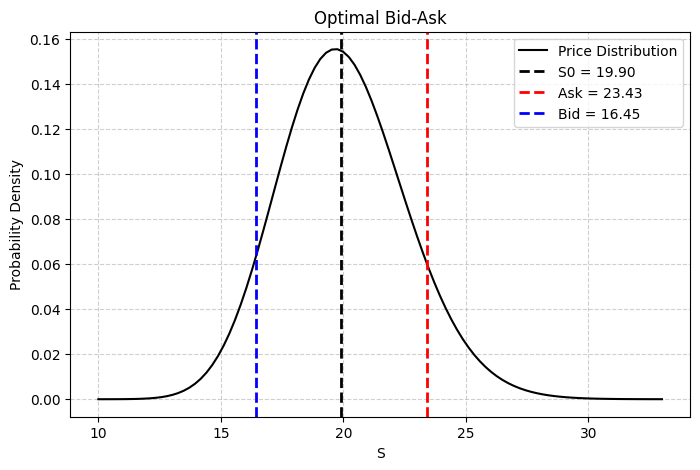

In [59]:
Bid_Ask(S, S0, ask, bid, ear)

---